In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

RLC 회로 정의

In [8]:
def rlc_system(t, state, vin):
    vC, i = state
    return [i, -vC - i + vin(t)]

입력 함수 정의

In [10]:
def vin_step(t):
    return 1.0

def make_vin_pulse(Delta):
    def vin_pulse(t):
        return 1.0 / Delta if 0 <= t < Delta else 0.0
    return vin_pulse

Simulation Parameters

In [11]:
t0, tf = 0, 15                   # 시간 구간 [0, 15]
t_eval = np.linspace(t0, tf, 300)  # 평가할 시간 벡터
initial_state = [0, 0] 

Problem 1

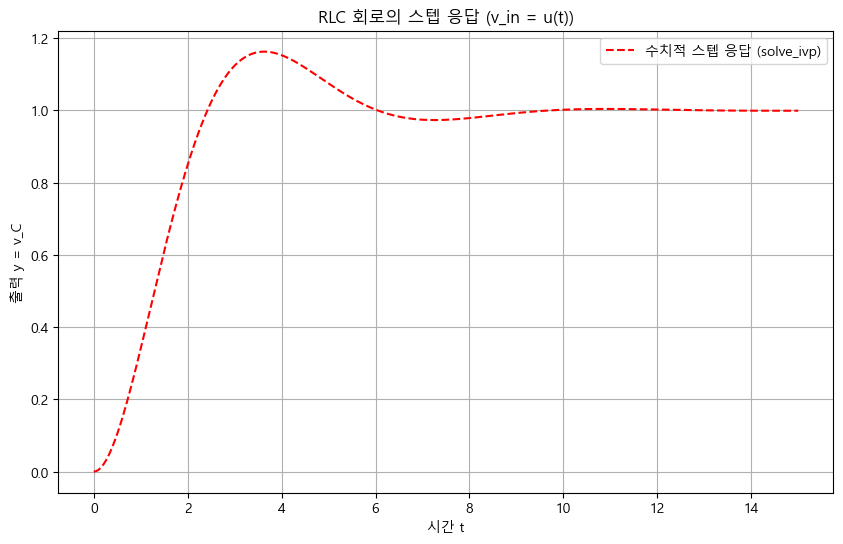

In [14]:
sol_step = solve_ivp(
    fun=lambda t, y: rlc_system(t, y, vin_step),
    t_span=(t0, tf),
    y0=initial_state,
    t_eval=t_eval
)

# 결과 플롯 (스텝 응답)
plt.figure(figsize=(10, 6))
plt.plot(sol_step.t, sol_step.y[0], 'r--', label='수치적 스텝 응답 (solve_ivp)')
plt.xlabel('시간 t')
plt.ylabel('출력 y = v_C')
plt.title('RLC 회로의 스텝 응답 (v_in = u(t))')
plt.legend()
plt.grid(True)
plt.show()

해석적 풀이

In [15]:
def analytic_step(t):
    return 1 - np.exp(-0.5 * t) * (np.cos((np.sqrt(3)/2) * t) + (1/np.sqrt(3)) * np.sin((np.sqrt(3)/2) * t))

def analytic_impulse(t):
    return (2/np.sqrt(3)) * np.exp(-0.5*t) * np.sin((np.sqrt(3)/2)*t)

Problem 2. Compare with Analytic Solution

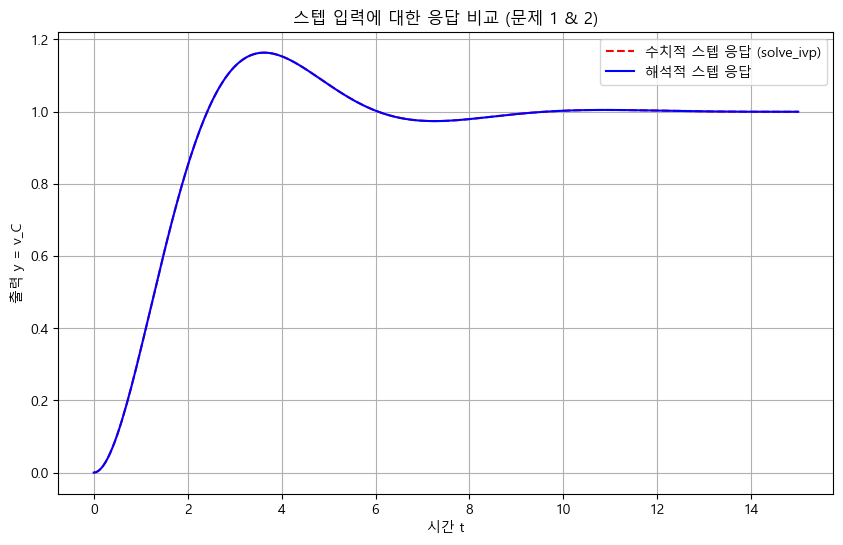

In [16]:
analytic_y_step = analytic_step(t_eval)
plt.figure(figsize=(10,6))
plt.plot(sol_step.t, sol_step.y[0], 'r--', label='수치적 스텝 응답 (solve_ivp)')
plt.plot(t_eval, analytic_y_step, 'b-', label='해석적 스텝 응답')
plt.xlabel('시간 t')
plt.ylabel('출력 y = v_C')
plt.title('스텝 입력에 대한 응답 비교 (문제 1 & 2)')
plt.legend()
plt.grid(True)
plt.show()

Problem 3. Impulse Response

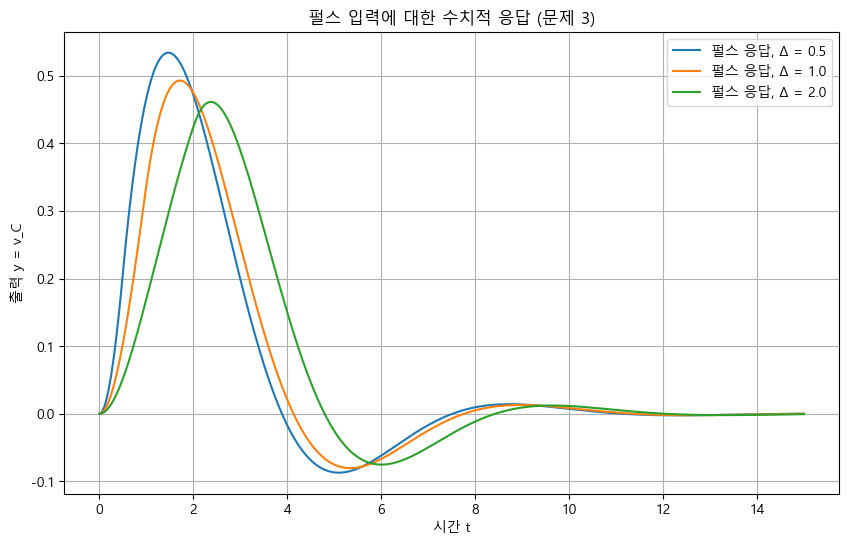

In [19]:
Delta_values = [0.5, 1.0, 2.0] 
plt.figure(figsize=(10,6))
for Delta in Delta_values:
    vin_pulse = make_vin_pulse(Delta)
    sol_pulse = solve_ivp(
        fun=lambda t, y: rlc_system(t, y, vin_pulse),
        t_span=(t0, tf),
        y0=initial_state,
        t_eval=t_eval
    )
    plt.plot(sol_pulse.t, sol_pulse.y[0], label=f'펄스 응답, Δ = {Delta}')
plt.xlabel('시간 t')
plt.ylabel('출력 y = v_C')
plt.title('펄스 입력에 대한 수치적 응답 (문제 3)')
plt.legend()
plt.grid(True)
plt.show()

Problem 4. Compare with Analytic Solution

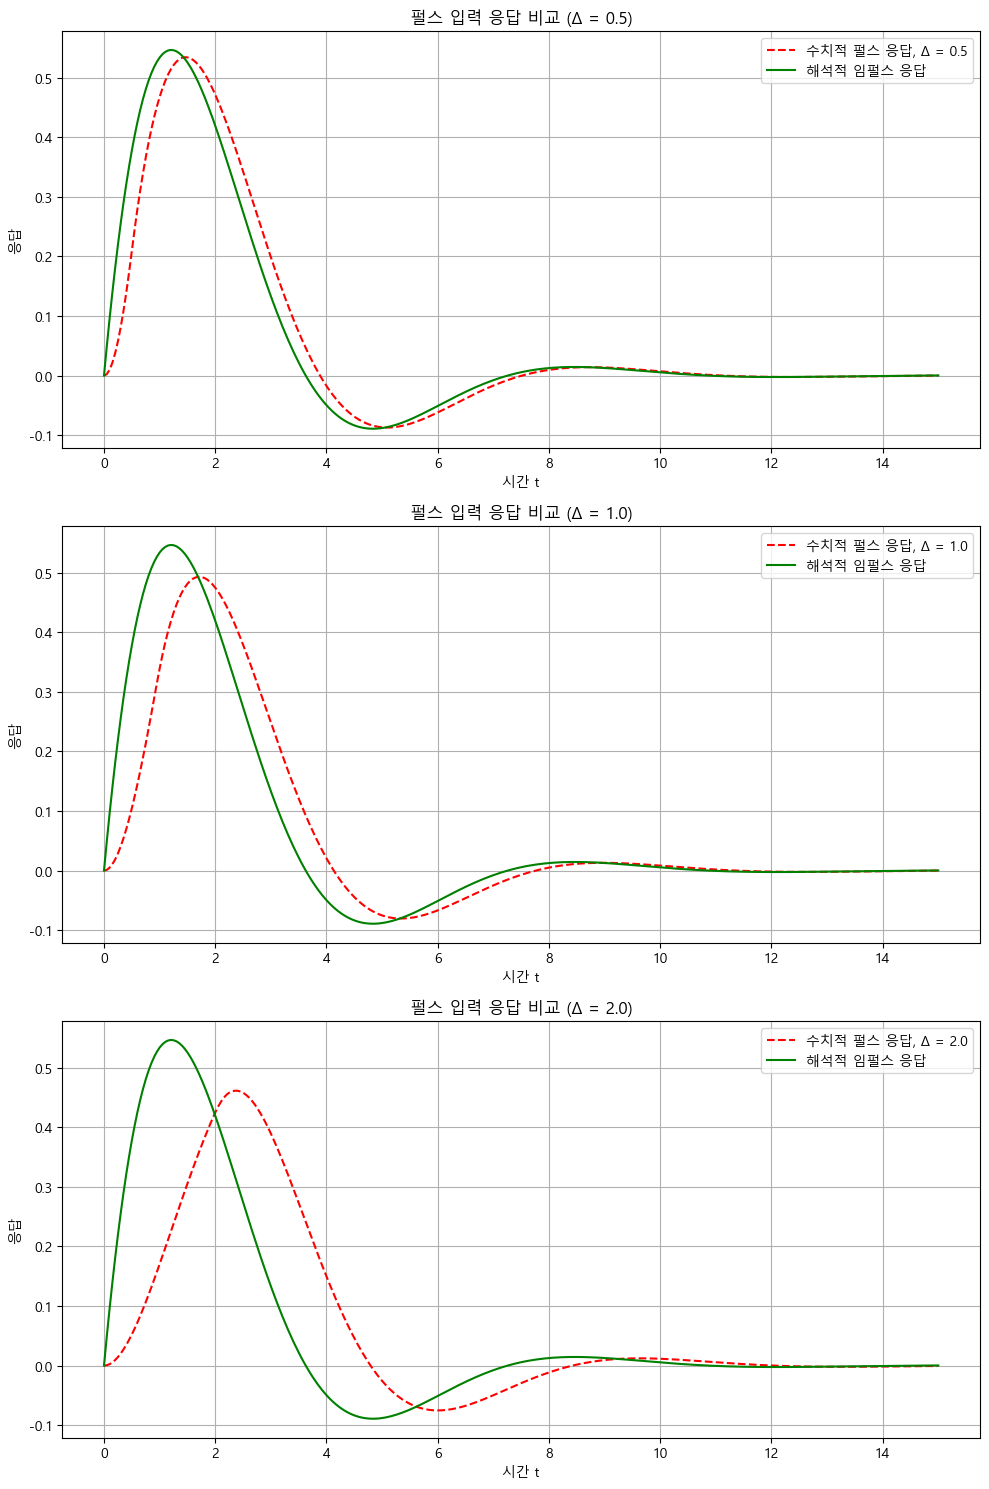

In [20]:
analytic_imp = analytic_impulse(t_eval)
fig, axs = plt.subplots(len(Delta_values), 1, figsize=(10, 15))
for idx, Delta in enumerate(Delta_values):
    vin_pulse = make_vin_pulse(Delta)
    sol_pulse = solve_ivp(
        fun=lambda t, y: rlc_system(t, y, vin_pulse),
        t_span=(t0, tf),
        y0=initial_state,
        t_eval=t_eval
    )
    axs[idx].plot(sol_pulse.t, sol_pulse.y[0], 'r--', label=f'수치적 펄스 응답, Δ = {Delta}')
    axs[idx].plot(t_eval, analytic_imp, 'g-', label='해석적 임펄스 응답')
    axs[idx].set_xlabel('시간 t')
    axs[idx].set_ylabel('응답')
    axs[idx].set_title(f'펄스 입력 응답 비교 (Δ = {Delta})')
    axs[idx].legend()
    axs[idx].grid(True)
plt.tight_layout()
plt.show()